In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# \<Assignment 3>

#### Student name: \< Esdras Luna>
#### Student ID: \< 23015971>



The dataset contains various features related to TB prevalence, mortality, incidence, and other factors. The target variable for our classifier is Region. 

# TASK 1: Load & Process the Dataset & Select Features

### Task 1a: Load the Dataset

We will begin by preprocessing the data, addressing missing values, and then proceed with feature selection, model training, and evaluation. Given that Naive Bayes is not sensitive to feature scaling, we will not standardize the features.

In [2]:
# Import general libraries
import pandas as pd

In [3]:
# Load the .xlsx file into a dataframe
df = pd.read_excel(r"C:\Users\Admin\OneDrive\Massey University\Semester 3\Data Wrangling & Machine Learning\Assignments\A3\Sample.xlsx")

# Display the dataframe to verify the data
df.head()

,Country or territory name,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,EMR,1990,11731193,306.0,156.0,506.0,36000.0,18000.0,59000.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,EMR,1991,12612043,343.0,178.0,562.0,43000.0,22000.0,71000.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,EMR,1992,13811876,371.0,189.0,614.0,51000.0,26000.0,85000.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,EMR,1993,15175325,392.0,194.0,657.0,59000.0,30000.0,100000.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,EMR,1994,16485018,410.0,198.0,697.0,68000.0,33000.0,110000.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN


In [4]:
# Get the number of rows and columns in the dataframe
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

# Get the column names in the dataframe
print("Column names: ", df.columns)

Number of rows:  499
Number of columns:  44
Column names:  Index(['Country or territory name', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       'Estimated number of deaths from TB (all forms, excluding HIV)',
       'Estim

In [5]:
# Determine how many columns there are  
print("Number of columns: ", len(df.columns))

# Determine how many unique values are in the 'Region' column
print("Number of unique values in the 'Region' column: ", df['Region'].nunique())

# Print out the unique values in the 'Region' column
print("Unique values in the 'Region' column: ", df['Region'].unique())

Number of columns:  44
Number of unique values in the 'Region' column:  6
Unique values in the 'Region' column:  ['EMR' 'EUR' 'AFR' 'WPR' 'AMR' 'SEA']


### Task 1b: Pre-Process the Data

**Encoding:**

Encoding is the process of transforming categorical data (e.g., "red," "blue," "green") into numerical representations that machine learning models can understand. This is often necessary as many algorithms can only operate on numerical data. However, in our case, since the features in our dataset are already represented as numerical data types (float64 and int64) additional encoding is not required in this case.

**Standarization/Normalization (Feature Scaling):**

- Standardization: Centers each feature by subtracting its mean and scales it by dividing by its standard deviation. This results in features with a mean of 0 and a standard deviation of 1.
- Normalization: Scales each feature to a specific range, typically 0 to 1.

While feature scaling is often beneficial for machine learning algorithms, it's not strictly required for Gaussian Naive Bayes (GNB) as this operates under the assumption that features within each class follow a Gaussian (normal) distribution and directly uses the mean and standard deviation of each feature to calculate probabilities. Since feature scaling doesn't change the underlying shape of the normal distribution (only its center and spread), it generally doesn't impact GNB's classification results.

While feature scaling is often beneficial for machine learning algorithms, it's not strictly required for Gaussian Naive Bayes (GNB). This is because GNB operates under the assumption that features within each class follow a Gaussian (normal) distribution and directly uses the mean and standard deviation of each feature to calculate probabilities. Since feature scaling doesn't change the underlying shape of the normal distribution (only its center and spread), it generally doesn't impact GNB's classification results, and is therefore not required in this case.

**Missing Values:**

We will handle missing values by dropping rows with missing values in the columns that are selected as features.

### Task 1c: Select the Target and Features 

Select the target variable (y) to predict and the features used for this (x) (i.e. a feature matrix)

We will consider the following features for this model:

- Estimated prevalence of TB (all forms) per 100 000 population
- Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population
- Estimated incidence (all forms) per 100 000 population
- Case detection rate (all forms), percent

These features are chosen as they are directly related to the TB burden and might be informative for predicting the region.

In [7]:
# Define your features 
features = ['Estimated prevalence of TB (all forms) per 100 000 population',
            'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
            'Case detection rate (all forms), percent']

# Define your target variable
target = ['Region']

# Create a new dataframe with only the columns of interest
df_subset = df[features + target].copy()  

# Drop any rows with missing values in either the features or the target
df_subset.dropna(inplace=True)

# Create feature matrix X and target variable y
X = df_subset[features]
y = df_subset[target]


# TASK 2: Create Classifier Models

### Task 2a: Gaussian Naive Bayes Models

Model Description:

These models implement a Gaussian Naive Bayes (GNB) classifier to predict categories within our dataset. Gaussian Naive Bayes (GNB) is a probabilistic algorithm that efficiently handles continuous numeric features by assuming they follow a normal distribution, estimating the mean and standard deviation for each feature within each category, and then calculating the probability of a new data point belonging to each category based on these estimations.

Key Points:

- Efficiency: GNB is computationally efficient, making it suitable for large datasets.
- Interpretability: The model's assumptions and calculations are relatively easy to understand, aiding in transparency.
- Continuous Features: Well-suited for datasets with continuous numeric features that follow a normal (Gaussian) distribution.
- Naive Assumption: GNB assumes features are independent of each other, which may not hold true in all real-world scenarios. Despite this assumption, GNB often performs surprisingly well overall.

##### Model 1: GNB Classifier with a single 80/20 Train-Test Split.

This model implements a single 80/20 Training-Test split for model development and evaluation. 

Reasoning:

A train-test split allows for the separation of data into two distinct sets in order to effectively train the model on one set and then evaluate its performance on a completely independent set. This helps prevent the model from simply memorizing the training data and ensures it can generalize to new, unseen examples.

Training:

The dataset is split into:

- Training Set (80%): Used to train the GNB classifier and identify patterns in the data.
- Testing Set (20%): Used to evaluate the classifier's performance on unseen data, ensuring its ability to generalize and make accurate predictions.

By training on a subset of the data and evaluating on a separate, unseen subset, we can confidently assess the classifier's ability to predict the target variable accurately in real-world scenarios.

In [10]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) 
# stratify=y ensures that the distribution of the target variable is the same in both the training and testing sets
# random_state=42 ensures reproducibility by setting the seed to a fixed number (in this case, 42)to ensure the same split each time it's run

# Train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training set
nb_classifier.fit(X_train, y_train.values.ravel())

# Predict the 'Region' categories on the testing set
y_pred = nb_classifier.predict(X_test)

Some visualization of the results.

Overall Accuracy: 0.54
              precision    recall  f1-score   support

         AFR       0.80      0.40      0.53        10
         AMR       0.57      0.68      0.62        25
         EMR       0.00      0.00      0.00         8
         EUR       0.67      0.48      0.56        33
         SEA       0.71      1.00      0.83         5
         WPR       0.30      0.78      0.44         9

    accuracy                           0.54        90
   macro avg       0.51      0.56      0.50        90
weighted avg       0.56      0.54      0.53        90



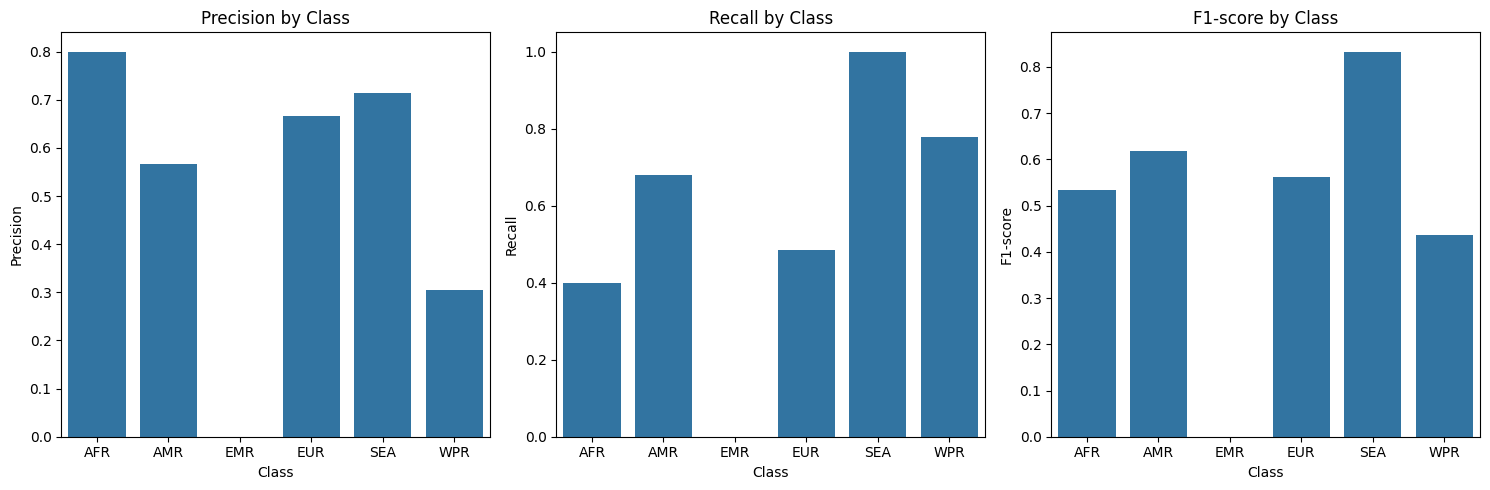

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get the classification report as a dictionary
report_data = classification_report(y_test, y_pred, output_dict=True)

# Extract accuracy from the report
accuracy = report_data.pop('accuracy')

# Remove 'accuracy', 'macro avg', and 'weighted avg' from the dictionary
report_data = {k: v for k, v in report_data.items() if k not in ['accuracy', 'macro avg', 'weighted avg']}

# Convert the dictionary to a DataFrame for plotting with Seaborn
df_report_data = pd.DataFrame(report_data).transpose().reset_index().rename(columns={'index': 'Class'})

# Create a figure and axes for multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Define the metrics for plotting
metrics = ['precision', 'recall', 'f1-score']

# Plot each metric as a separate bar chart
for i, metric in enumerate(metrics):
    sns.barplot(data=df_report_data, x='Class', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_ylabel(f'{metric.capitalize()}')
    axes[i].set_xlabel('Class')

# Adjust the spacing between subplots
plt.tight_layout()

# Print the overall accuracy
print(f'Overall Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))    

# Show the plot
plt.show()

##### Model 2: GNB Classifier with 10-fold cross-validation

This model implements 10-fold Cross-Validation with 10 folds, instead of single train-test split, for model development and evaluation.

Reasoning:

Single train-test splits can be sensitive to the specific data division, potentially leading to misleading performance estimates depending on the specific split. To overcome this, we utilize 10-fold cross-validation, which offers a more robust evaluation by repeatedly training and testing the model on different subsets of the data. This approach can help us gain a more comprehensive understanding of the model's ability to generalize and reduce the risk of overfitting.

Training:

The dataset is randomly partitioned into 10 equal folds.
In each iteration:
- 9 folds are used for training the model.
- The remaining fold serves as the testing set to evaluate the model's performance.

This process is repeated 10 times, with each fold used as the testing set once. The final performance metric, often accuracy, is calculated as the average of the 10 individual performance scores from each fold. By incorporating 10-fold cross-validation, we can be more confident in the model's ability to generalize and make accurate predictions in real-world scenarios.

In [25]:
# Import the necessary libraries
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming your 'features' and 'target' variables are already defined
X = df_subset[features]  
y = df_subset[target]

# Convert y to a numpy array
y = df_subset[target].values.ravel()  # Convert to 1D NumPy array

# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB() 

# Perform 10-fold cross-validation on the classifier using accuracy as the scoring metric
accuracy_scores = cross_val_score(nb_classifier, X, y, cv=10, scoring='accuracy')

# Calculate and print mean accuracy of the classifier
mean_accuracy = np.mean(accuracy_scores)
print(f"Mean Accuracy: {mean_accuracy:.2f}")

# Calculate and print standard deviation of accuracy
std_accuracy = np.std(accuracy_scores)
print(f"Standard Deviation of Accuracy: {std_accuracy:.2f}")

Mean Accuracy: 0.46
Standard Deviation of Accuracy: 0.18



Performance Evaluation:

The classification report provides a summary of key metrics to assess how well the classifier performed in predicting the categories.

Model Evaluation Metrics:

- Accuracy: The proportion of correctly classified instances.
- Precision: The ability of the model to not label a negative sample as positive.
- Recall: The ability of the model to find all positive samples.
- F1-score: A balance between precision and recall.
- Confusion Matrix: A table summarizing the model's predictions versus the actual labels.

Findings for Naive Bayes Classifiers:

1. Single Train-Test Split: achieved an overall accuracy of X% on the test set. This indicates that it can predict the region category better than random guessing, but there's room for improvement. 

2. 10-fold cross-validation: achieves a mean accuracy of x% with a standard deviation of x%. This suggests that the model's performance is less stable across different folds compared to the single train-test split result. 

The high standard deviation indicates that the accuracy varies considerably depending on the data used for training and testing in each fold. This result highlights the importance of using cross-validation to get a more reliable estimate of model performance, as a single train-test split might not be representative of the model's true generalization ability.

### Task 2b: k-Nearest Neighbours Models

Model Description:

These models utilize a k-nearest neighbour classifier to to predict categories within our dataset. 

kNN is a simple yet effective non-parametric algorithm that classifies new data points based on the majority category among their 'k' closest neighbors in the feature space.

Key Points:

- Versatility: kNN is a versatile tool for classification tasks, especially when linear models are insufficient as it can capture complex, non-linear patterns.
- Minimal Assumptions: It doesn't require assumptions about the underlying data distribution, unlike some other algorithms. 
- Sensitive to Irrelevant Features: If your dataset contains many irrelevant features, kNN's performance can suffer, as it considers all features equally important during classification. Therefore, careful selection or feature engineering is recommended for achieving optimal results.
- Parameter Selection: The choice of 'k' (number of neighbors) significantly impacts performance. A small 'k' may lead to overfitting, while a large 'k' may oversimplify the decision boundary. Experimentation with different k values is encouraged to find the optimal value for the specific case. 
- Computationally Intensive: Predicting labels for new data points can be computationally expensive, especially for large datasets or high values of 'k' as it needs to calculate distances to all training points.



General Recommendations for finding the best value for k.

- Odd Values of k: It's generally recommended to use odd values of k to avoid ties in the "voting" process when deciding on the class of a new data point.
- Cross-Validation: The best way to choose the optimal k is to use cross-validation. This allows you to systematically evaluate the model's performance for different k values and select the one that generalizes best to unseen data.
- Square Root Rule (Starting Point): A common rule of thumb is to start with k equal to the square root of the number of samples in your training set. This is often a good starting point, but you should always experiment with different values of k around that initial estimate.
- Avoid Overfitting: Uing a very small value for k (like 1) often leads to overfitting as the model becomes overly sensitive to noise and outliers in the training data, and it fails to generalize well to new data. Setting a minimum value for k (e.g., 3 or 5) can help prevent the model from becoming too complex and overfitting.

##### Model 1: kNN Classifier with 80/20 Split. 
- k = square root of number of samples

This model implements a single 80/20 Training-Test split for model development and evaluation.

Reasoning:

A train-test split allows for the separation of data into two distinct sets in order to effectively train the model on one set and then evaluate its performance on a completely independent set. This helps prevent the model from simply memorizing the training data and ensures it can generalize to new, unseen examples. 

Training:

We'll utilize the same 80/20 train-test split we used for the GNB models to maintain consistency for comparison. kNN is a lazy learner, meaning it doesn't build an explicit model during training. Instead, it stores the training data and uses it directly for prediction.

In [28]:
# Import the necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Make k the value of the square root of the number of samples in the training set
k = int(np.sqrt(len(X_train))) 

# Create a kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training set
knn_classifier.fit(X_train, y_train)

# Predict the 'Region' categories on the testing set
y_pred = knn_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the k value used
print(f'k: {k}')

# Print the accuracy of the classifier
print(f'Accuracy: {knn_classifier.score(X_test, y_test):.2f}')


              precision    recall  f1-score   support

         AFR       0.90      0.90      0.90        10
         AMR       0.57      0.48      0.52        25
         EMR       0.50      0.38      0.43         8
         EUR       0.64      0.70      0.67        33
         SEA       0.71      1.00      0.83         5
         WPR       0.60      0.67      0.63         9

    accuracy                           0.64        90
   macro avg       0.65      0.69      0.66        90
weighted avg       0.64      0.64      0.64        90

k: 18
Accuracy: 0.64


##### Model 2: kNN Classifier with single 80/20 Split. 
- k = optimal k found from a range of odd numbers from 3 to 21

K-Value |   Accuracy |   F1-Score
------- | ---------- | ----------
     3 | 0.778   | 0.777
     5 | 0.756   | 0.755
     7 | 0.733   | 0.732
     9 | 0.744   | 0.744
    11 | 0.700   | 0.698
    13 | 0.722   | 0.721
    15 | 0.733   | 0.734
    17 | 0.722   | 0.723
    19 | 0.711   | 0.710


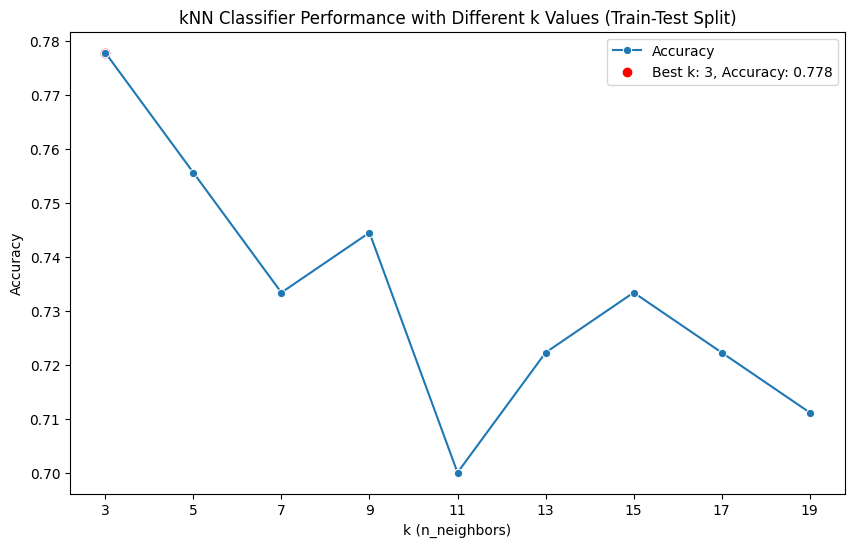

Best k (n_neighbors): 3
Mean Accuracy: 0.78


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


# PHASE 1: Find the best k value using a train-test split

# Define the range of k values to try
k_values = range(3, 21, 2)

accuracies = []  # Changed variable name
f1_scores = []

# Table header
print("K-Value |   Accuracy |   F1-Score")
print("------- | ---------- | ----------")

# Fixed train-test split for all k values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate over the range of k values
for k in k_values:
    # Create a kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training set
    knn_classifier.fit(X_train, y_train)

    # Predict the labels for the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy and F1-score for this k-value
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    f1_scores.append(f1)

    # Print results for each k
    print(f"{k:6d} | {accuracy:.3f}   | {f1:.3f}")

# Find the k value with the highest accuracy (no change needed here)
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'k (n_neighbors)': k_values,
                          'Accuracy': accuracies,
                          'F1-Score': f1_scores})

# Create the line plot with both accuracy and F1-score
plt.figure(figsize=(10, 6))
sns.lineplot(x='k (n_neighbors)', y='Accuracy', data=results_df, marker='o', label='Accuracy')
#sns.lineplot(x='k (n_neighbors)', y='F1-Score', data=results_df, marker='x', label='F1-Score')

# Add the best k value to the plot
plt.scatter(best_k, best_accuracy, color='red', label=f'Best k: {best_k}, Accuracy: {best_accuracy:.3f}')
plt.legend()

# Set plot title and labels
plt.title('kNN Classifier Performance with Different k Values (Train-Test Split)')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Accuracy')

# Modify x-axis ticks to increase by 1
plt.xticks(k_values)

# Show the plot
plt.show()


# Print the best k value and mean accuracy
print(f'Best k (n_neighbors): {best_k}')
print(f'Mean Accuracy: {best_accuracy:.2f}')

##### Model 3: kNN Classifier with k-fold cross-validation. 
- k = optimal k found from a range of odd numbers from 3 to 21

K-Value | Mean Accuracy | Mean F1-Score
------- | ------------- | ------------
     3 | 0.601    | 0.581
     5 | 0.590    | 0.572
     7 | 0.585    | 0.565
     9 | 0.578    | 0.557
    11 | 0.572    | 0.545
    13 | 0.561    | 0.535
    15 | 0.549    | 0.517
    17 | 0.538    | 0.502
    19 | 0.504    | 0.471


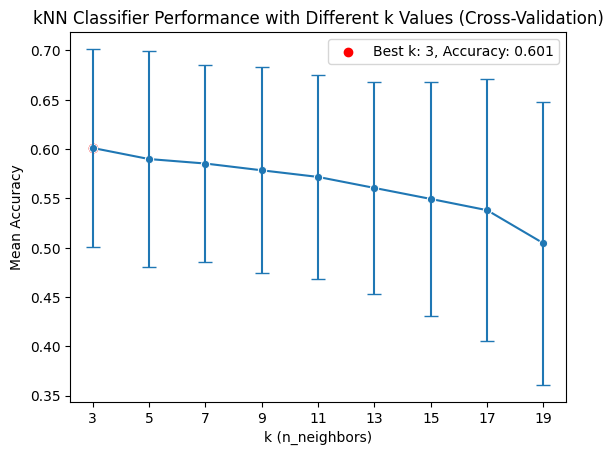

Best k (n_neighbors): 3
Mean Accuracy: 0.60
Standard Deviation of Accuracy: 0.10


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# ... (Your code for loading and preprocessing the dataset) ...

# Define the range of k values to try 
k_values = range(3, 21, 2) # a range of odd numbers from 3 to 21

mean_accuracies = []
mean_f1_scores = []
std_accuracies = []

# Table header
print("K-Value | Mean Accuracy | Mean F1-Score")
print("------- | ------------- | ------------")

# Iterate over the range (list) of k values
for k in k_values:
    # Create a kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform 10-fold cross-validation
    accuracy_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')
    f1_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='f1_weighted')  # F1 with weighted average

    # Calculate and store means
    mean_accuracies.append(np.mean(accuracy_scores))
    mean_f1_scores.append(np.mean(f1_scores))

    # Calculate and store standard deviation of accuracy
    std_accuracies.append(np.std(accuracy_scores))

    # Print results for each k using a formatted string
    print(f"{k:6d} | {np.mean(accuracy_scores):.3f}    | {np.mean(f1_scores):.3f}")


# Find the k value with the highest mean accuracy
best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = max(mean_accuracies)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'k (n_neighbors)': k_values,
                          'Mean Accuracy': mean_accuracies,
                          'Std Deviation': std_accuracies})

# Create the line plot
sns.lineplot(x='k (n_neighbors)', y='Mean Accuracy', data=results_df, marker='o')

# Add error bars
plt.errorbar(x=results_df['k (n_neighbors)'], y=results_df['Mean Accuracy'], yerr=results_df['Std Deviation'], fmt='none', capsize=5)

# Add the best k value to the plot
plt.scatter(best_k, best_accuracy, color='red', label=f'Best k: {best_k}, Accuracy: {best_accuracy:.3f}')
plt.legend()

# Set plot title and labels
plt.title('kNN Classifier Performance with Different k Values (Cross-Validation)')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Mean Accuracy')

# Modify x-axis ticks to match the k values
plt.xticks(k_values)

# Show the plot
plt.show()

# Print the best k value and mean accuracy
print(f'Best k (n_neighbors): {best_k}')
print(f'Mean Accuracy: {best_accuracy:.2f}')
print(f'Standard Deviation of Accuracy: {std_accuracies[np.argmax(mean_accuracies)]:.2f}')


In [49]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

# PHASE 1: Find the best k using Cross-Validation

# Define the range of k values to try 
k_values = range(3, 21, 2)

# Optimize k using Cross-Validation
mean_accuracies_cv = []
mean_f1_scores_cv = []
std_accuracies_cv = []  # Store standard deviations for cross-validation

# Table header for cross-validation results
print("\nk-Optimization (Cross-Validation):")
print("K-Value | Mean CV Accuracy | Mean CV F1-Score |   Std Dev")
print("------- | --------------- | -------------- | ----------")

# Iterate over the range of k values. For each k, do the following:
for k in k_values:

    # Create a kNN classifier with the current k
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Perform 10-fold cross-validation with shuffling to prevent bias (i.e. inherent ordering in the data)
    cv = KFold(n_splits=10, shuffle=True, random_state=42) 
    # Get accuracy scores for each fold
    accuracy_scores = cross_val_score(knn_classifier, X, y, cv=cv, scoring='accuracy')
    # Get F1 scores for each fold
    f1_scores = cross_val_score(knn_classifier, X, y, cv=cv, scoring='f1_weighted') 
    # Calculate and store mean accuracy for this k
    mean_accuracies_cv.append(np.mean(accuracy_scores))
    # Calculate and store mean F1-score for this k
    mean_f1_scores_cv.append(np.mean(f1_scores))
    # Calculate and store standard deviation of accuracy for this k
    std_accuracies_cv.append(np.std(accuracy_scores)) 
    # Print cross-validation results for each k
    print(f"{k:6d} | {np.mean(accuracy_scores):.3f}    | {np.mean(f1_scores):.3f}    | {np.std(accuracy_scores):.3f}")

# Find the best k based on cross-validation
best_k = k_values[np.argmax(mean_accuracies_cv)]

# PHASE 2: Evaluate model performance using k-fold Cross-Validation with the best k

# Create a kNN classifier with the best k
knn_classifier_best = KNeighborsClassifier(n_neighbors=best_k)

# Perform k-fold cross-validation with the best k
final_accuracy_scores = cross_val_score(knn_classifier_best, X, y, cv=cv, scoring='accuracy')
final_f1_scores = cross_val_score(knn_classifier_best, X, y, cv=cv, scoring='f1_weighted')

# Calculate and print final evaluation metrics using formatted strings
print("\nFinal Evaluation (Cross-Validation with Best k):")
print(f"K-Value: {best_k}")
print(f"Mean Accuracy: {np.mean(final_accuracy_scores):.3f}")
print(f"Standard Deviation of Accuracy: {np.std(final_accuracy_scores):.3f}")
print(f"Mean F1-Score: {np.mean(final_f1_scores):.3f}")



k-Optimization (Cross-Validation):
K-Value | Mean CV Accuracy | Mean CV F1-Score |   Std Dev
------- | --------------- | -------------- | ----------
     3 | 0.767    | 0.765    | 0.047
     5 | 0.747    | 0.747    | 0.074
     7 | 0.742    | 0.741    | 0.056
     9 | 0.715    | 0.714    | 0.060
    11 | 0.709    | 0.704    | 0.070
    13 | 0.709    | 0.705    | 0.061
    15 | 0.691    | 0.687    | 0.059
    17 | 0.684    | 0.681    | 0.059
    19 | 0.684    | 0.679    | 0.052

Final Evaluation (Cross-Validation with Best k):
K-Value: 3
Mean Accuracy: 0.767
Standard Deviation of Accuracy: 0.047
Mean F1-Score: 0.765


In [ ]:
# Define the range of k values to try
k_range = range(3, 21, 2)  

# Call the function
plot_knn_performance(X, y, k_range)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

def plot_knn_performance(X, y, k_range):
    accuracy_arr = []
    precision_arr = []
    recall_arr = []
    f1_score_arr = []

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X, y)  # Train the classifier
        y_pred = knn.predict(X)  # Predict on the training data itself to avoid overfitting

        accuracy_arr.append(accuracy_score(y, y_pred))
        precision_arr.append(precision_score(y, y_pred, average='weighted', zero_division=1))  # Weighted average to handle multi-class
        recall_arr.append(recall_score(y, y_pred, average='weighted', zero_division=1))
        f1_score_arr.append(f1_score(y, y_pred, average='weighted', zero_division=1))

    plt.figure(figsize=(10, 12))

    metrics = [accuracy_arr, precision_arr, recall_arr, f1_score_arr]
    metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    for i, (metric, metric_name) in enumerate(zip(metrics, metric_names), 1):
        plt.subplot(4, 1, i)
        plt.plot(k_range, metric, c='k', label=metric_name)
        plt.axis('tight')
        plt.xlabel('k number of nearest neighbors')
        plt.ylabel(metric_name)
        plt.legend(loc='upper right')
        plt.title(f"{metric_name} for the KNeighborsClassifier")

    plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
    plt.show()


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create feature matrix X and target variable y
X = df[['Estimated prevalence of TB (all forms) per 100 000 population',
        'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
        'Estimated incidence (all forms) per 100 000 population',
        'Case detection rate (all forms), percent']]
y = df['Region']

# Define different values of k to test
k_values = {'n_neighbors': range(1, 21)}

# Lists to store mean accuracy and standard deviation for each k value tested
mean_accuracies = []
std_accuracies = []

# Iterate over the range (list) of k values. For each k-value, do the following:
for k in k_values['n_neighbors']:

    # Create a kNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform 10-fold cross-validation on the classifier using accuracy as the scoring metric
    accuracy_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate and store mean accuracy for the classifier
    mean_accuracies.append(np.mean(accuracy_scores))

    # Calculate and store standard deviation of accuracy for the classifier
    std_accuracies.append(np.std(accuracy_scores))

# Compare the mean accuracies and standard deviations for each k value to find the best k (i.e. the one with the highest mean accuracy)
best_k_index = np.argmax(mean_accuracies)
# Get the best k value 
best_k = k_values['n_neighbors'][best_k_index]
# Get the best mean accuracy 
best_mean_accuracy = mean_accuracies[best_k_index]
# Get the best standard deviation of accuracy
best_std_accuracy = std_accuracies[best_k_index]

# Print the results
print(f"Best k (n_neighbors): {best_k}")
print(f"Mean Accuracy: {best_mean_accuracy:.2f}")
print(f"Standard Deviation of Accuracy: {best_std_accuracy:.2f}")


Best k (n_neighbors): 1
Mean Accuracy: 0.66
Standard Deviation of Accuracy: 0.11


Visualize the results.

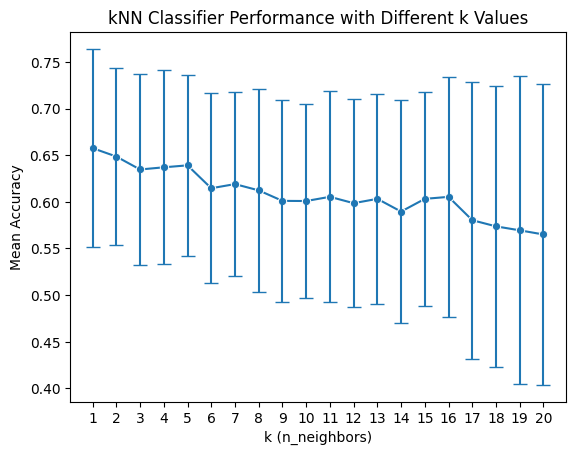

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store the results
results_df = pd.DataFrame({'k (n_neighbors)': k_values['n_neighbors'],
                           'Mean Accuracy': mean_accuracies,
                           'Std Deviation': std_accuracies})

# Create the line plot
sns.lineplot(x='k (n_neighbors)', y='Mean Accuracy', data=results_df, marker='o')

# Add error bars
plt.errorbar(x=results_df['k (n_neighbors)'], y=results_df['Mean Accuracy'], yerr=results_df['Std Deviation'], fmt='none', capsize=5)

# Set plot title and labels
plt.title('kNN Classifier Performance with Different k Values')
plt.xlabel('k (n_neighbors)')
plt.ylabel('Mean Accuracy')

# Modify x-axis ticks to increase by 1 to match the k values tested
plt.xticks(results_df['k (n_neighbors)']) 

# Show the plot
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# ... (Assuming X_train, X_test, y_train, y_test are already defined from the previous split) ...

# Choose the value of k
k = 5  # You can adjust this value

# Create a kNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training set
knn_classifier.fit(X_train, y_train)

# Predict the 'Region' categories on the testing set
y_pred = knn_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Extra: 

cd "C:\Users\Admin\OneDrive\Massey University\Semester 3\Data Wrangling & Machine Learning\Assignments\A3"

streamlit run app.py

cd "C:\Users\Admin\OneDrive\Massey University\Semester 3\Data Wrangling & Machine Learning\Assignments\A3" && streamlit run app.py

### Task 2.a 

### Task 2.b

### Task 2.c

### Task 2.d 